In [18]:
%pip install pandas
%pip install sklearn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

## Combinar dataset

In [4]:
df_full = pd.concat([pd.read_csv("dataset/sign_mnist_test.csv"), 
          pd.read_csv("dataset/sign_mnist_train.csv")], axis=0).reset_index(drop=True)
df_full = df_full.sample(frac=1, random_state=1313).reset_index(drop=True)
df_full
df_full.to_csv("dataset/sign_mnist_full.csv",index=False)

In [ ]:
mappings = np.array(["a","b","c","d","e","f","g","h","i","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"])

In [9]:
from sklearn.preprocessing import StandardScaler
x = df_full.loc[:,  df_full.columns != "label"].values / 255
y = df_full.loc[:,["label"]].values

# SS = StandardScaler()
# x = SS.fit_transform(x)
x = pd.DataFrame(x)

# PCA: 113 dimensiones para explicar 95% de varianza

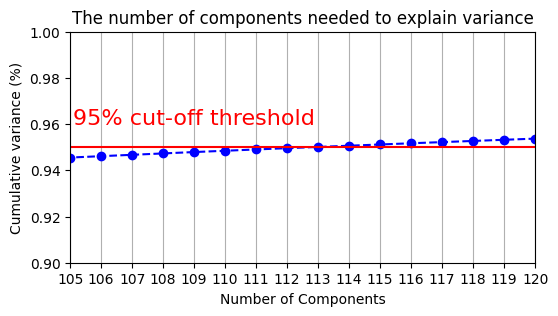

In [34]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

#% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,3)
# plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 785, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 784, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')

ax.grid(axis='x')
plt.xlim(105, 120)
plt.ylim(0.9,1)
plt.text(105.1, 0.96, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# LDA: 20 dimensiones para explicar 95% de varianza


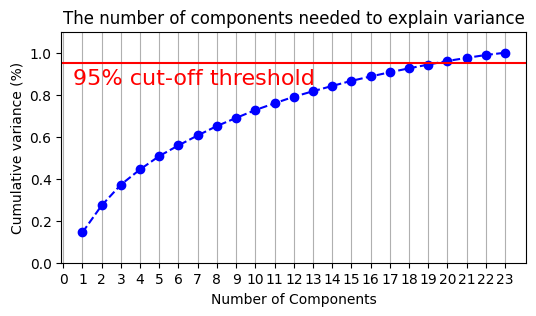

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=23).fit(x,y.ravel())


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,3)
# plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 24, step=1)
yi = np.cumsum(lda.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 24, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')

ax.grid(axis='x')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
# plt.xlim(75, 85)
plt.show()

## Cargar datos

In [33]:
sign_df = pd.read_csv("dataset/sign_mnist_full.csv")

sign_X = sign_df.loc[:,  sign_df.columns != "label"].values
sign_Y = sign_df.loc[:,["label"]].values

sign_df_train = pd.read_csv("dataset/sign_mnist_train.csv")

sign_X_train = sign_df_train.loc[:,  sign_df_train.columns != "label"].values
sign_Y_train = sign_df_train.loc[:,["label"]].values

sign_df_test = pd.read_csv("dataset/sign_mnist_test.csv")

sign_X_test = sign_df_test.loc[:,  sign_df_test.columns != "label"].values
sign_Y_test = sign_df_test.loc[:,["label"]].values

In [2]:
df_train_augmented = pd.read_csv("dataset/sign_mnist_train_augmented.csv")

sign_X_train_augmented = df_train_augmented.loc[:,  df_train_augmented.columns != "label"].values
sign_Y_train_augmented = df_train_augmented.loc[:,["label"]].values


## Data Augmentation

In [37]:
import skimage
import random
from skimage import transform
from skimage import exposure

def distort_affine_skimage(X, rotation=10.0, shear=5.0, random_state=None):
    if random_state is None:
        random_state = np.random.RandomState(None)
        random.seed(None)
    else:
      np.random.RandomState(random_state)
      np.random.seed(random_state)
      random.seed(random_state)

    X_flip = []
    # for i in range(X.shape[0]):
    for i in range(1):
      rot = np.deg2rad(np.random.uniform(rotation-5, rotation) * random.choices([1,-1])[0])
      sheer = np.deg2rad(np.random.uniform(shear-5, shear) * random.choices([1,-1])[0])
      img = np.array(X[i].reshape((28, 28)), dtype=np.uint8)

      # exposure y contraste
      img = exposure.adjust_gamma(img, np.random.uniform(0.3,0.8)) #0.3 - 2
      shape = img.shape
      shape_size = shape[:2]
      center = np.float32(shape_size) / 2. - 0.5

      # rotacion y skewing
      pre = transform.SimilarityTransform(translation=-center)
      affine = transform.AffineTransform(rotation=rot, shear=sheer, translation=center)
      tform = pre + affine
      distorted_img = np.uint8(transform.warp(img, tform.params, mode='reflect') * 255)

      X_flip.append(distorted_img.reshape((784)))
    X_trfr = np.array(X_flip)
    return X_trfr.astype(np.int64)

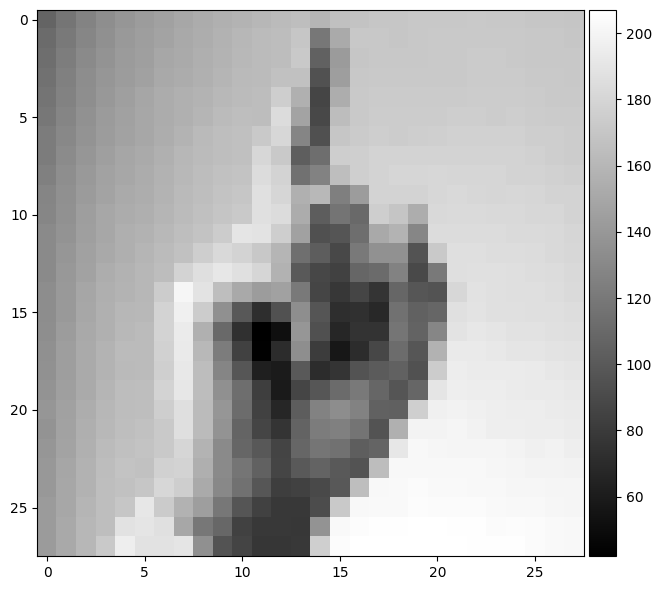

In [939]:
imshow(sign_X_train[0].reshape((28,28)), interpolation='none', cmap='gray')

C:\Users\SSD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


(1, 784)
int64
[13]


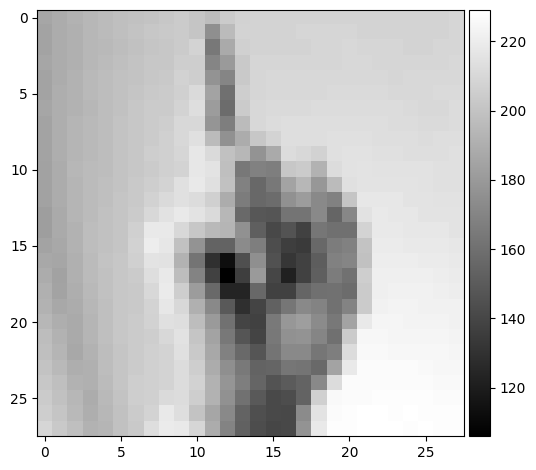

In [38]:
from skimage.io import imread, imshow

X_rot = distort_affine_skimage(sign_X_train,8,15)

imshow(X_rot[0].reshape((28,28)), interpolation='none', cmap='gray')

print(X_rot.shape)
min(X_rot[0])
min(sign_X_train[0])
print(X_rot[0].dtype)
print(sign_Y_train[4])

# Generar modelo

In [26]:
from xml.etree.ElementInclude import include
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, recall_score, precision_score,roc_auc_score
from sklearn.metrics import classification_report
import numpy as np
import itertools

def Generate_model(X_, Y_, model = None, reducer = None):
#   kf = KFold(n_splits=k_splits_, shuffle=shuffle_)
    precision = recall = f1 = AUC = 0
    # i = 0
#   for train_index, test_index in kf.split(X_):
    # Seleccion train test splits para este KFold
    # X_train, X_test = X_[train_index, :], X_[test_index, :] 
    # Y_train, Y_test = Y_[train_index], Y_[test_index]
    X_train = X_
    Y_train = Y_

    # Normalizacion de datos
    Scaler = StandardScaler()
    # X_train = Scaler.fit_transform(X_train)
    # X_train = pd.DataFrame(X_train)
    X_train = X_train / 255

    # X_test = Scaler.transform(X_test)
    # X_test = pd.DataFrame(X_test)

    # reducir dimensionalidad, mapea a n_comps_ vectores
    if reducer == None:
      X_train_reducer = X_train
    #   X_test_reducer = X_test
    else:
      X_train_reducer = reducer.fit_transform(X_train,Y_train.ravel())
    #   X_test_reducer = reducer.transform(X_test)

    # Fit, Predict
    model.fit(X_train_reducer, Y_train.ravel())

    return (model, reducer, Scaler)

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier

K_ = 16
vector = 50

final_model, final_reducer, final_scaler  = Generate_model(sign_X_train_augmented, sign_Y_train_augmented, 
                                            # model=CalibratedClassifierCV(LinearSVC(max_iter=10000)),
                                            model=SVC(decision_function_shape='ovo', probability=False),
                                            # model=KNeighborsClassifier(n_neighbors=K_),
                                            # model = DecisionTreeClassifier(criterion="gini",max_depth=None),
                                            # reducer=LDA(n_components=vector))
                                            # reducer=None)
                                            reducer = LDA(n_components=20)
                                          )
                        # table_res_kf = pd.concat([table_res_kf, pd.DataFrame([np.append(res, 
                        #                     [f"KFold(n_iterations={k_f}, shuffle={sh})",
                        #                     f"LDA(n_components={vector})",
                        #                     f"KNeighborsClassifier(n_neighbors={K_})"])],
                        #                     columns=cols)],axis=0, ignore_index = True)
                        # table_res_kf.to_csv("table_res_kf_output.csv",index=False) #write

from joblib import dump, load
dump((final_model, final_reducer, final_scaler), 'final_model.joblib')

['final_model.joblib']

In [27]:
%pip install scikit-image
%pip install pywt


     --------------------------------------- 12.0/12.0 MB 10.4 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 10.8 MB/s eta 0:00:00
     -------------------------------------- 208.5/208.5 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 14.3 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 12.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


In [29]:

from tkinter import Y
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import pywt
from joblib import dump, load
from sklearn.metrics import f1_score, recall_score, precision_score,roc_auc_score

import pywt.data
from PIL import Image

clf,red,sca = load('final_model.joblib') 

# X_test = sca.transform(sign_X_test)
X_test = sign_X_test / 255
Y_test = sign_Y_test
# print(max(X_test[0]))
X_test_reducer = red.transform(X_test)
# X_test_reducer = X_test
# # print(X_test_reducer)
# X_test_reducer = X_test


Y_predicted = clf.predict(X_test_reducer)
precision = precision_score(Y_test, Y_predicted, average="macro")
recall = recall_score(Y_test, Y_predicted, average="macro")
f1 = f1_score(Y_test, Y_predicted,  average="macro")
# AUC = roc_auc_score(Y_test, clf.predict_proba(X_test_reducer),multi_class='ovr',average='macro')
AUC=0
print(f"Final metrics\n", 
"Precision:", "{:.2f}".format(precision),
" | Recall:", "{:.2f}".format(recall), 
" | F1:", "{:.2f}".format(f1),
" | AUC:","{:.2f}".format(AUC))
# plot_cnf_matrix(Y_test, Y_pre
print(mappings[Y_predicted])
X_test = pd.DataFrame(X_test)

print(mappings[Y_test].flatten())


Final metrics
 Precision: 0.57  | Recall: 0.58  | F1: 0.57  | AUC: 0.00


NameError: name 'mappings' is not defined

C:\Users\SSD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


['u']


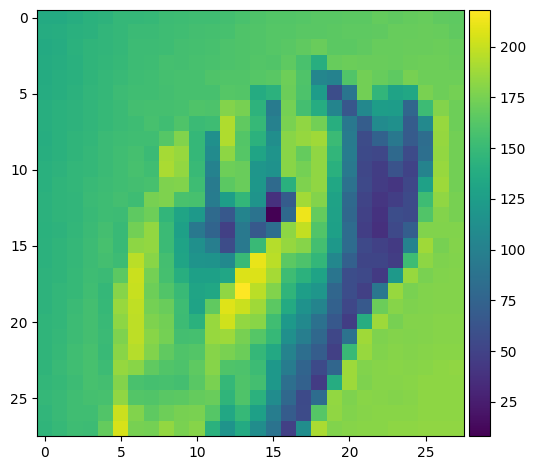

In [6]:

from tkinter import Y
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import pywt
from joblib import dump, load
from sklearn.metrics import f1_score, recall_score, precision_score,roc_auc_score

import pywt.data
from PIL import Image

clf,red,sca = load('final_model.joblib') 

# def Haar(imagen, cortes):
#   for i in range(cortes):
#     imagen, (LH, HL, HH) = pywt.dwt2(imagen, 'haar') 
#   return imagen

# # foto1 = "test_imgs/image (19).png"
# # foto  = (imread(foto1))

# # print(foto)
# # imagen = Haar(img,4)
# # print(imagen.shape)
# # imshow(imagen)
# imshow(sign_X[2].reshape((28, 28)))
img = np.asarray(Image.open("test_imgs/image (8).jpg").convert('L'))
# imshow(img)
imshow(sign_X_train_augmented[2].reshape((28, 28)))

test_img = img.flatten()
# print(max(sign_X[0]))
# print(max(test_img))
# # print(foto)

# X_test = sca.transform([test_img])
X_test = [test_img / 255]
# # print(max(X_test[0]))
X_test_reducer = red.transform(X_test)
# # print(X_test_reducer)
# X_test_reducer = X_test

Y_predicted = clf.predict(X_test_reducer)

print(mappings[Y_predicted])


int64
uint8


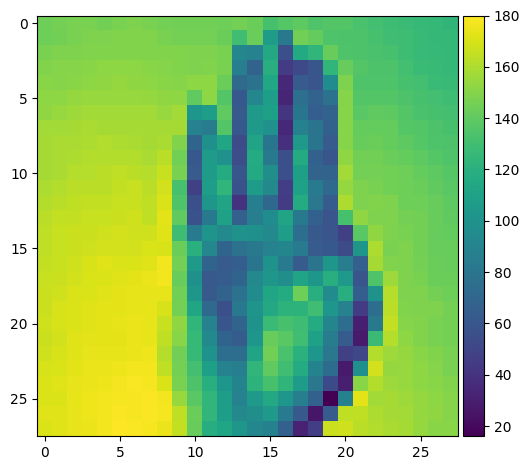

In [31]:
imshow(sign_X_train_augmented[11].reshape((28, 28)))
print(sign_X_train_augmented[2].dtype)
print(test_img.dtype)

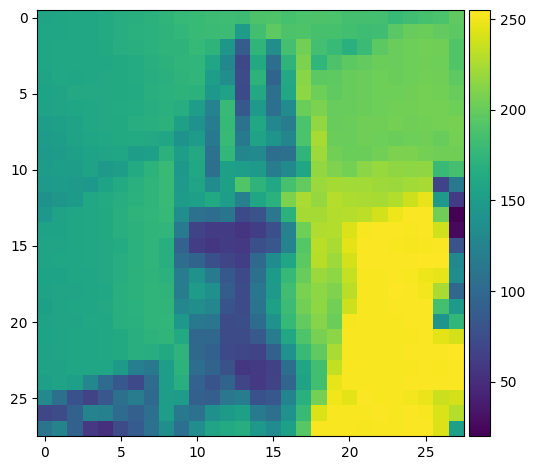

In [32]:
imshow(test_img.astype(np.int64).reshape((28,28)))


## Crear dataset aumentado, shuffle con seed 1313

In [1030]:
df_train = pd.read_csv("dataset/sign_mnist_train.csv")

X_train = df_train.loc[:,  df_train.columns != "label"].values
Y_train = df_train.loc[:,["label"]].values

X_distort = distort_affine_skimage(X_train,8,15,1313)
X_distort.shape

(27455, 784)

In [1031]:
df_train_augmented = pd.concat([df_train,
  pd.DataFrame(np.concatenate((Y_train, X_distort), axis=1),
  columns=df_train_augmented.columns)], axis=0).reset_index(drop=True)

df_train_augmented = df_train_augmented.sample(frac=1, random_state=1313).reset_index(drop=True)
df_train_augmented.shape
df_train_augmented.to_csv("dataset/sign_mnist_train_augmented.csv",index=False)

In [1055]:
sign_X_train_augmented.shape


(54910, 784)